# Steps:
## 1).Preprocessing
## 2).Feature Selection
## 3).Model Selection
## 4).Model Building
## 5).Cross Validation
## 6).Predicting values

# Importing Necessary Libs

In [217]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [218]:
warnings.filterwarnings('ignore')
#%matplotlib inline

train_df=pd.read_csv(r"D:\Datasets\Titanic Kaggle\train.csv")
test_df=pd.read_csv(r"D:\Datasets\Titanic Kaggle\test.csv")

print('__Train_DataSet_')
train_df.head()

print('__Test_DataSet_')
test_df.head()



__Train_DataSet_
__Test_DataSet_


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Finding Missing Values in Datasets

<AxesSubplot:title={'center':'Percent missing data by feature'}, xlabel='Features', ylabel='Percent of missing values'>

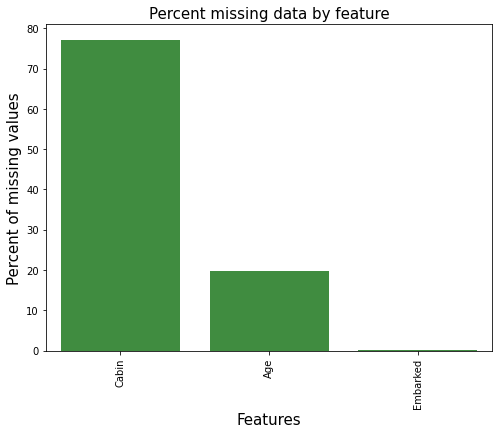

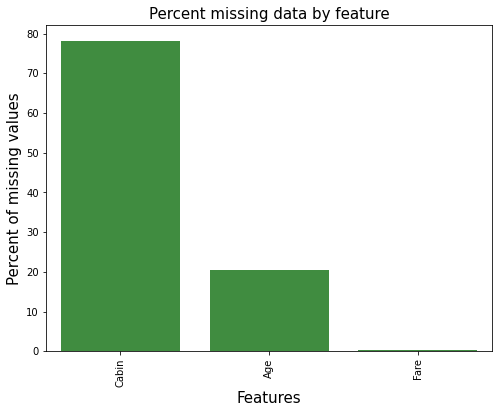

In [219]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ax
missingdata(train_df)
missingdata(test_df)


# Pre - processing the data


In [220]:
#filling values in fare and embarked columns of train and test set respectivley using fillna
test_df['Age'].mean()
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

#dropping cabin column as it does not e=affect our predcitions
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

#filling values in age columns of train and test set respectivley using fillna
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

print('check the nan value in train data')
print(train_df.isnull().sum())
print('___'*20)
print('check the nan value in test data')
print(test_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
____________________________________________________________
check the nan value in test data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Creating new columns 'Title' which includes common and rare title
# and 'Family Size' for sum of family members 

In [221]:
## combine test and train as single to apply some function
all_data=[train_df,test_df]

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

all_data[0].head()
all_data[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,Mrs


# Creating Age bin and Fare bin columns for bifurcating economy and age traits

In [222]:
## create bin for age features
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,45,120], labels=['Children','Teenage','Adult','Elder'])

## create bin for fare features
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                         'Average_fare','high_fare'])
all_data[0].head()
all_data[1].head()
   

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,Mr,Adult,Low_fare
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2,Mrs,Elder,Low_fare
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,Mr,Elder,median_fare
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,Mr,Adult,median_fare
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3,Mrs,Adult,median_fare


# Dropping non necessary columns from a copy of the orig dataset

In [223]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train_df
testdf=test_df

all_dat=[traindf,testdf]

for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)



testdf.head(5)
traindf.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,0,3,male,1,0,S,2,Mr,Adult,Low_fare
1,1,1,female,1,0,C,2,Mrs,Adult,high_fare
2,1,3,female,0,0,S,1,Miss,Adult,median_fare
3,1,1,female,1,0,S,2,Mrs,Adult,high_fare
4,0,3,male,0,0,S,1,Mr,Adult,median_fare


# Labeling categorical variables into Numerical variables

In [224]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

traindf.head()



,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,1,0,2,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,1,1,1,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
3,1,1,1,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


# removing each dummy variable's one column to avoid dummy trap.

In [225]:
all_dat=[traindf,testdf]
for dataset in all_dat:
    drop_column = ['Sex_female','Title_Master','Age_type_Children','Em_type_C','Fare_type_Low_fare']
    dataset.drop(drop_column, axis=1 , inplace = True)
    
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_Q,Em_type_S,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0
1,893,3,1,0,2,0,0,0,1,0,0,0,1,0,1,0,0,0
2,894,2,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0
3,895,3,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0
4,896,3,1,1,3,0,0,0,1,0,0,1,0,0,1,1,0,0


In [226]:
traindf.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'Sex_male',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Age_type_Teenage',
       'Age_type_Adult', 'Age_type_Elder', 'Em_type_Q', 'Em_type_S',
       'Fare_type_median_fare', 'Fare_type_Average_fare',
       'Fare_type_high_fare'],
      dtype='object')

# Importing libraries for model

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC




In [228]:
# Spliting the Training dataset 

Targeted_feature = traindf["Survived"]
all_features = traindf.drop("Survived", axis=1)

X_train, X_val, y_train, y_val = train_test_split(all_features ,Targeted_feature, test_size=0.2, random_state=42)
X_train.shape


(712, 17)

In [229]:
#create param for choosing better model classifier
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}

# Model Selection using GridSearchCV

In [230]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.808992,{'criterion': 'gini'}
1,KNeighborsClassifier,0.818792,{'n_neighbors': 10}
2,SVC,0.828583,"{'C': 1, 'kernel': 'rbf'}"


# Importing libs for SVM and Cross Validation

In [231]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_val)

print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_val)*100,2))



--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 82.68


In [232]:
kfold = KFold(n_splits=10, random_state=None) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))



The cross validated score for Support Vector Machines Classifier is: 82.94


Text(0.5, 1.05, 'Confusion_matrix')

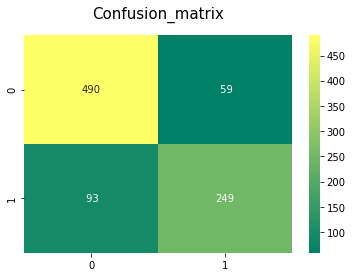

In [233]:
import seaborn as sns
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [234]:
# Removing PassengerId column from our test daaset
testdf.drop(['PassengerId'],axis=1,inplace=True)
testdf.columns


Index(['Pclass', 'SibSp', 'Parch', 'FamilySize', 'Sex_male', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Age_type_Teenage',
       'Age_type_Adult', 'Age_type_Elder', 'Em_type_Q', 'Em_type_S',
       'Fare_type_median_fare', 'Fare_type_Average_fare',
       'Fare_type_high_fare'],
      dtype='object')

# Creating the predicted variable

In [235]:
y_predicted = model.predict(testdf)
y_predicted

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Making submission Dictiionary CSV file

In [213]:
submission = pd.DataFrame({
        "PassengerId": test_df['PassengerId'],
        "Survived": y_predicted
    })
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [214]:
submission.to_csv('titanic_submission_v01.csv', index=False)